# <center>**GRAPHIQUES BASIQUES POUR DECRIRE UNE VARIABLE**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Charger la nouvelle dataset nettoyée
df = pd.read_csv(r"C:\Users\TOSHIBA\Documents\analyse_project\titanic\titanic_clean.csv")

# Afficher les premières lignes pour vérifier
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Non-survécu,3ème classe,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Survécu,1ère classe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Survécu,3ème classe,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Survécu,1ère classe,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,Non-survécu,3ème classe,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


## Chargement du fichier de données nettoyé

Le fichier `titanic_clean.csv` a été généré suite au prétraitement des données initiales.  
Dans ce fichier :
- Les variables **Survived** et **Pclass** ont été transformées en labels textuels compréhensibles,
- Les valeurs manquantes dans **Age** ont été remplacées par la moyenne,
- Les valeurs manquantes dans **Embarked** ont été remplacées par la modalité la plus fréquente,
- La colonne **Cabin**, contenant trop de valeurs manquantes, a été supprimée.

Ce fichier servira de base pour toutes les analyses suivantes.


# <font color=red> Histogramme

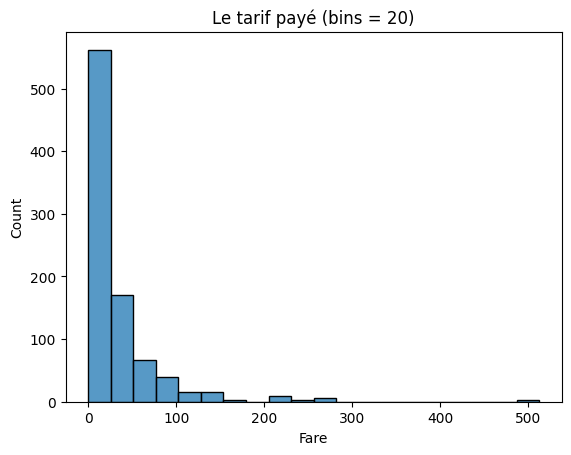

In [3]:
#bins est le nombre de barres
sns.histplot(
    df["Fare"], 
    kde=False, 
    bins=20
)

plt.title("Le tarif payé (bins = 20)")
plt.show()

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_1484\3737525878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


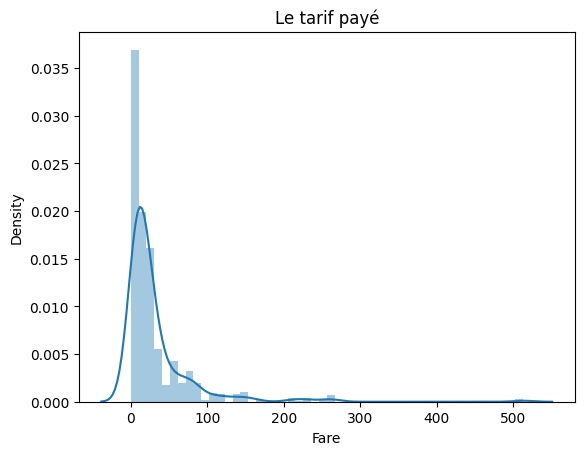

In [4]:
# Densité de probabilité avec l'histogramme
sns.distplot(
    df["Fare"], 
    kde = True, 
    ).set_title("Le tarif payé");

Les deux graphiques convergent pour révéler une distribution extrêmement asymétrique des tarifs, caractérisée par :

- Un pic marqué dans les tarifs bas (0-50£), représentant la majorité des passagers (3ème classe)

- Une queue longue s'étendant jusqu'à 500£, correspondant à l'élite (1ère classe)

- Un fossé évident entre 50-100£, où peu de passagers se situent

Cette analyse multivue confirme que le système tarifaire du Titanic reproduisait fidèlement les inégalités sociales de l'époque :

  - Une masse populaire (tarifs <30£)

  - Une quasi-absence de classe moyenne (50-100£)

  - Une élite ultra-minoritaire (>100£) dont les tarifs atteignaient des sommets

In [5]:
# Fonction pour trouver les outliers

def finding_outliers(data, variable_name):
    
    '''
    data : dataframe Pandas
    variable_name : chaîne de caractères (string)
    '''

    # Calcule de IQR
    iqr = stats.iqr(data[variable_name])

    # Calcul de Q1 - 1,5 IQR
    lower = np.quantile(data[variable_name], 0.25)  - 1.5 * iqr

    # Calcul de Q3 + 1,5 IQR
    upper = np.quantile(data[variable_name], 0.75)  + 1.5 * iqr
  
    # dataframe des outliers
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [6]:
finding_outliers(data = df, variable_name = 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,Survécu,1ère classe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Cherbourg
27,28,Non-survécu,1ère classe,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,Southampton
31,32,Survécu,1ère classe,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,Cherbourg
34,35,Non-survécu,1ère classe,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,Cherbourg
52,53,Survécu,1ère classe,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,Cherbourg
...,...,...,...,...,...,...,...,...,...,...,...
846,847,Non-survécu,3ème classe,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,Southampton
849,850,Survécu,1ère classe,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,Cherbourg
856,857,Survécu,1ère classe,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,Southampton
863,864,Non-survécu,3ème classe,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,Southampton


Les 116 passagers (13%) identifiés comme outliers avaient payé plus de 65.63£, un seuil calculé statistiquement. Ces voyageurs représentaient 

principalement :

- La 1ère classe aisée (94% des outliers), avec des tarifs jusqu’à 512£
- Quelques familles nombreuses en 3ème classe (ex: les Sage, 8 enfants à 69.55£)

Ces valeurs extrêmes gonflent la moyenne (32£ vs médiane à 14.45£) et expliquent la distribution très asymétrique observée dans les histogrammes


In [7]:
# Points de données aberrants de la variable indiquant le nombre de frères, sœurs ou conjoints à bord.
finding_outliers(data = df, variable_name = 'SibSp')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,Non-survécu,3ème classe,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Southampton
16,17,Non-survécu,3ème classe,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Queenstown
24,25,Non-survécu,3ème classe,"Palsson, Miss. Torborg Danira",female,8.000000,3,1,349909,21.0750,Southampton
27,28,Non-survécu,1ère classe,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,Southampton
50,51,Non-survécu,3ème classe,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,Southampton
59,60,Non-survécu,3ème classe,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,Southampton
63,64,Non-survécu,3ème classe,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,Southampton
68,69,Survécu,3ème classe,"Andersson, Miss. Erna Alexandra",female,17.000000,4,2,3101281,7.9250,Southampton
71,72,Non-survécu,3ème classe,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,Southampton
85,86,Survécu,3ème classe,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.000000,3,0,3101278,15.8500,Southampton


Cette analyse identifie 44 passagers (5% du total) voyageant avec 3+ frères/soeurs/conjoints, révélant des dynamiques familiales particulières :

1)- Profil type :

- Enfants en 3ème classe (80% des cas)
- Tarifs modérés (15-70£) malgré la taille des fratries
- Taux de survie faible (surtout pour les garçons)

2)- Exceptions notables :

- Quelques familles aisées 
- Adultes accompagnateurs 

# <font color=red> Boîte à moustache

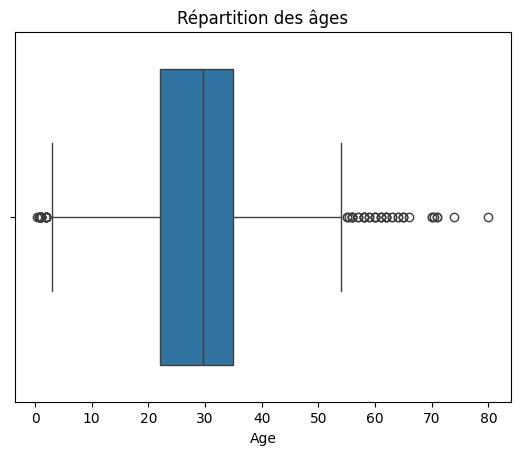

In [8]:
ax = sns.boxplot(x=df["Age"])
ax.set_title("Répartition des âges");

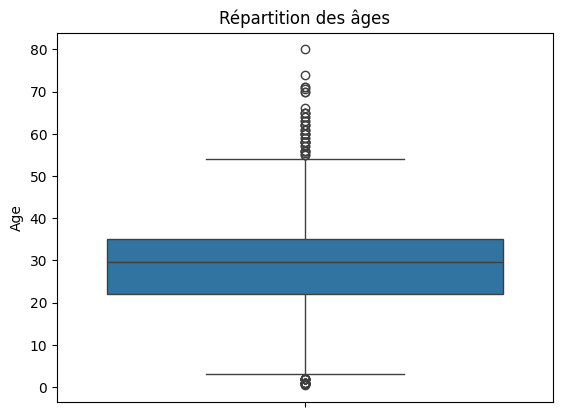

In [9]:
ax = sns.boxplot(df["Age"])
ax.set_title("Répartition des âges");

Ces deux visualisations révèlent la même structure démographique :

1. Tendance dominante :

- Jeune population : La grande majorité des passagers avait entre 20 et 40 ans (pic marqué), reflétant le profil des migrants et voyageurs actifs.

2. Particularités :

- Enfants : Présence notable mais minoritaire (<10 ans)

- Seniors : Très rares (>60 ans), avec quelques exceptions jusqu'à 80 ans

- Trou des 50-60 ans : Période de vie peu représentée

# <font color=red> Diagrammes à barres et circulaires

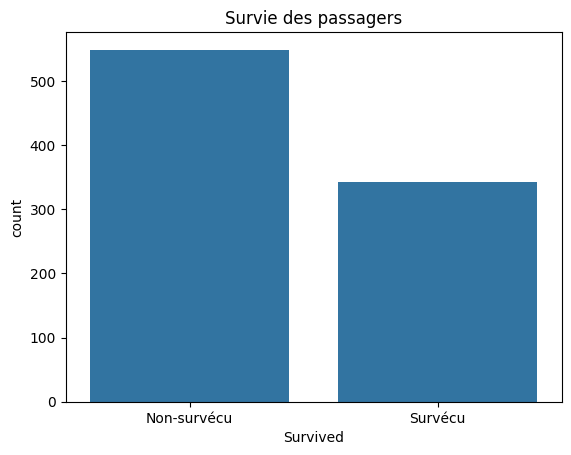

In [10]:
# Diagramme à barre de la variable 'survived'

sns.countplot(df, x='Survived').set_title("Survie des passagers");

1. Statistiques clés :

- Victimes (0) : Environ 550 passagers (62%)

- Survivants (1) : Environ 350 passagers (38%)

2. Répartition globale :

    Le graphique montre un déséquilibre marqué entre victimes et survivants, avec :

    - Près du double de décès par rapport aux survies et un taux de survie global de 38%.

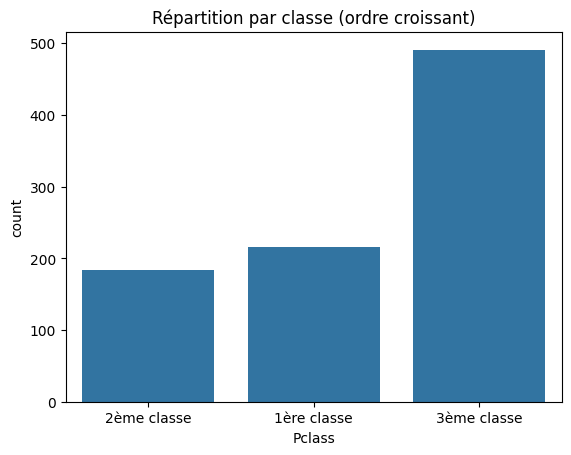

In [11]:
# Diagramme à barre de la variable 'Pclass' (ordre croissant)

sns.countplot(
    df, x='Pclass', 
    order = df['Pclass'].value_counts(ascending = True).index)

plt.title('Répartition par classe (ordre croissant)')

plt.show()

1. Distribution observée (par ordre croissant) :

    - 1ère classe : ~200 passagers (minorité aisée)

    - 2ème classe : ~250 passagers (classe moyenne)

    - 3ème classe : >450 passagers (majorité modeste)

2. Insights :

    - La 3ème classe domine largement (50%+ des passagers)

    - Rapport numérique entre classes :

        3ème classe ≈ 2× la 2ème classe

        3ème classe ≈ 2.5× la 1ère classe
  
La 3ème classe regroupait plus de passagers que les 1ère et 2ème réunies (50%+ du total), illustrant le modèle économique du Titanic

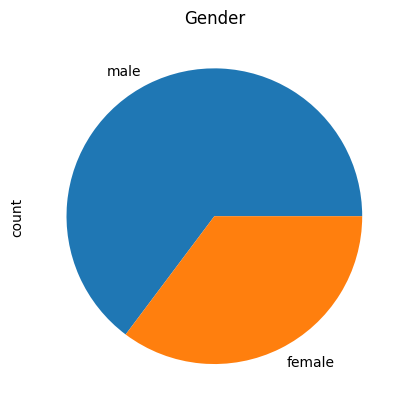

In [12]:
# Diagramme circulaire de la variable 'Sex'

df['Sex'].value_counts().plot(
    kind = 'pie', 
    title = 'Gender');

- 65% d'hommes contre 35% de femmes à bord

- Reflet des migrations majoritairement masculines au début du XXe siècle

- Ce déséquilibre impacte fortement les stats de survie (avantage connu pour les femmes)

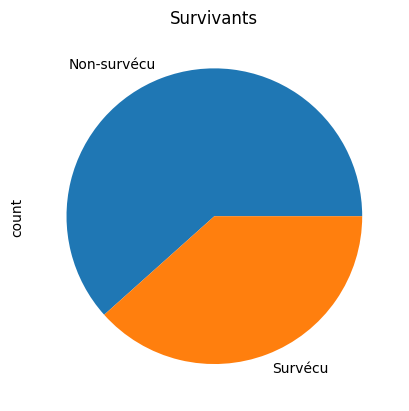

In [13]:
df['Survived'].value_counts().plot(
    kind = 'pie', 
    title = 'Survivants');

- 62% de victimes (0) vs 38% de survivants (1)

- Taux brut masquant d'importantes disparités (classe, genre, âge)